In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [5]:
df[:5]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:, :-1].values  #Excluding one variable to avoid dummy variable trap

In [7]:
y = df.iloc[:, -1].values

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc_X = StandardScaler()

In [10]:
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
X_train[:5]

array([[ 0.60603081, -0.9027491 ],
       [-0.54012675,  1.47580428],
       [ 0.03295203, -0.57973568],
       [-0.54012675,  1.91627713],
       [ 1.37013584, -1.43131652]])

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
classifier = LogisticRegression(random_state= 0)

In [16]:
classifier.fit(X_train, y_train, )

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
import seaborn as sns

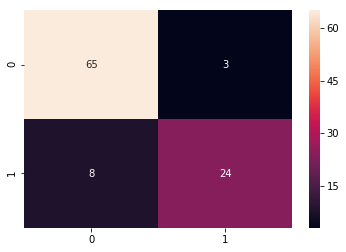

In [21]:
sns.heatmap(cm, annot = True)

In [22]:
from matplotlib.colors import ListedColormap

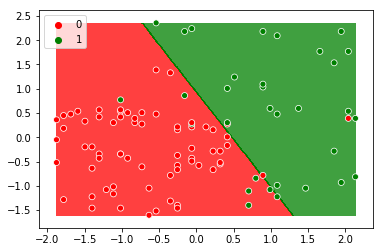

In [23]:
X_set, Y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_test[:, 0], X_test[:, 1], palette = {0: "red", 1: "green"}, hue = y_test)